In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

query = """
DECLARE @enrolled TABLE (cnt int,  dt int)
DECLARE @graduated TABLE (cnt int,  dt int)

INSERT INTO @enrolled
SELECT COUNT(DISTINCT s.student_id_fk) AS enrolled
, DATEPART(year, m.term_timestamp) as dt
FROM Students AS s
JOIN Majors AS m
ON s.student_id_fk = m.student_id_fk
WHERE m.dept_name = 'Physics-Astronomy'
AND s.first_course_datetime BETWEEN '1993' AND '2013'
AND m.graduated IS NULL
AND m.Student_Level_Code = 'UN'
GROUP BY  DATEPART(year, m.term_timestamp)

INSERT INTO @graduated
SELECT COUNT(DISTINCT s.student_id_fk) AS enrolled
, DATEPART(year, m.term_timestamp) as dt
FROM Students AS s
JOIN Majors AS m
ON s.student_id_fk = m.student_id_fk
WHERE m.dept_name = 'Physics-Astronomy'
AND s.first_course_datetime BETWEEN '1993' AND '2013'
AND m.graduated = 'CONF'
AND m.Student_Level_Code = 'UN'
GROUP BY DATEPART(year, m.term_timestamp)

SELECT e.cnt AS enrolled
, ISNULL(g.cnt, 0) AS graduated
, e.dt
FROM @enrolled AS e
LEFT JOIN @graduated AS g
ON e.dt = g.dt
ORDER BY e.dt
"""

In [21]:
df = pd.read_csv('data/enrollment.csv', names=['enrolled', 'graduated', 'year'])
df['ratio'] = df['graduated']/df['enrolled']
df = df[df['year'].between(1993, 2016)].copy()

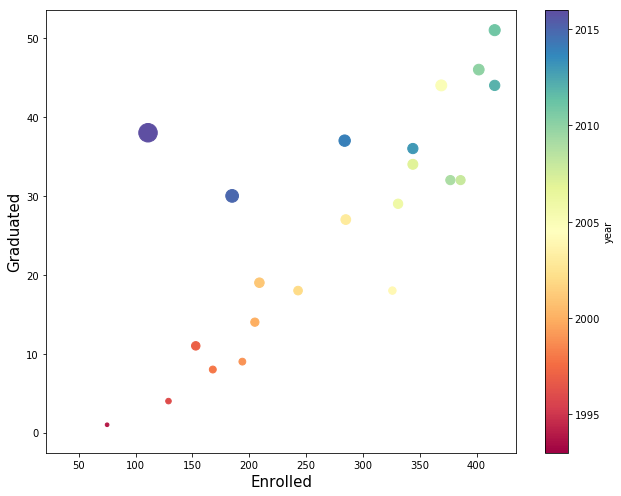

In [26]:
fig, ax = plt.subplots(figsize=(9, 7))

df.plot.scatter(x='enrolled', y='graduated', s= df['graduated']/df['enrolled']*1000, ax=ax, c='year', cmap='Spectral')

ax.set_xlabel('Enrolled', fontsize=15)
ax.set_ylabel('Graduated', fontsize=15)

fig.tight_layout()

fig.savefig('figures/enrollment.pdf', bbox_inches='tight')